### Table des matières
* [Partie1: Structure des données](#p1)
  * [1.Les librairies](#lib)
  * [2.Dataset initial](#di)
       * [2.1.Dataset1 : EdStatsCountry-Series.csv](#d1)
      
* [Parti2:Nettoyage des données](#p2)
  * [1.Les colonnes](#col)
  * [2.Regroupement par catégorie](#cat)

# Partie1: Structure des données <a class="anchor" id="p1"></a>
## 1.Les librairies<a class="anchor" id="lib"></a>

In [30]:
!pip3 install plotly

     --------------------------------------- 15.2/15.2 MB 12.8 MB/s eta 0:00:00
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [1]:
import pandas as pd
import numpy as np
from hurry.filesize import size
import missingno as msno


## 2.Dataset initial<a class="anchor" id="di"></a>

In [9]:
df=pd.read_csv("data.csv",sep='\t',on_bad_lines='skip',low_memory=False)

In [39]:
#shape
print('Initial dataset \n')
print('Number of rows:', df.shape[0],'\n')
print('Number of columns:', df.shape[1])

Initial dataset 

Number of rows: 320772 

Number of columns: 162


In [2]:
#Memory consumption
df_memory = df.memory_usage().sum()


In [4]:
# Let's print out the memory consumption
print('Total Current memory is-', df_memory,'Bytes.','===>',size(df_memory))

#Memory usage of each dimension
#df.memory_usage()


Total Current memory is- 415720640 Bytes. ===> 396M


<AxesSubplot:>

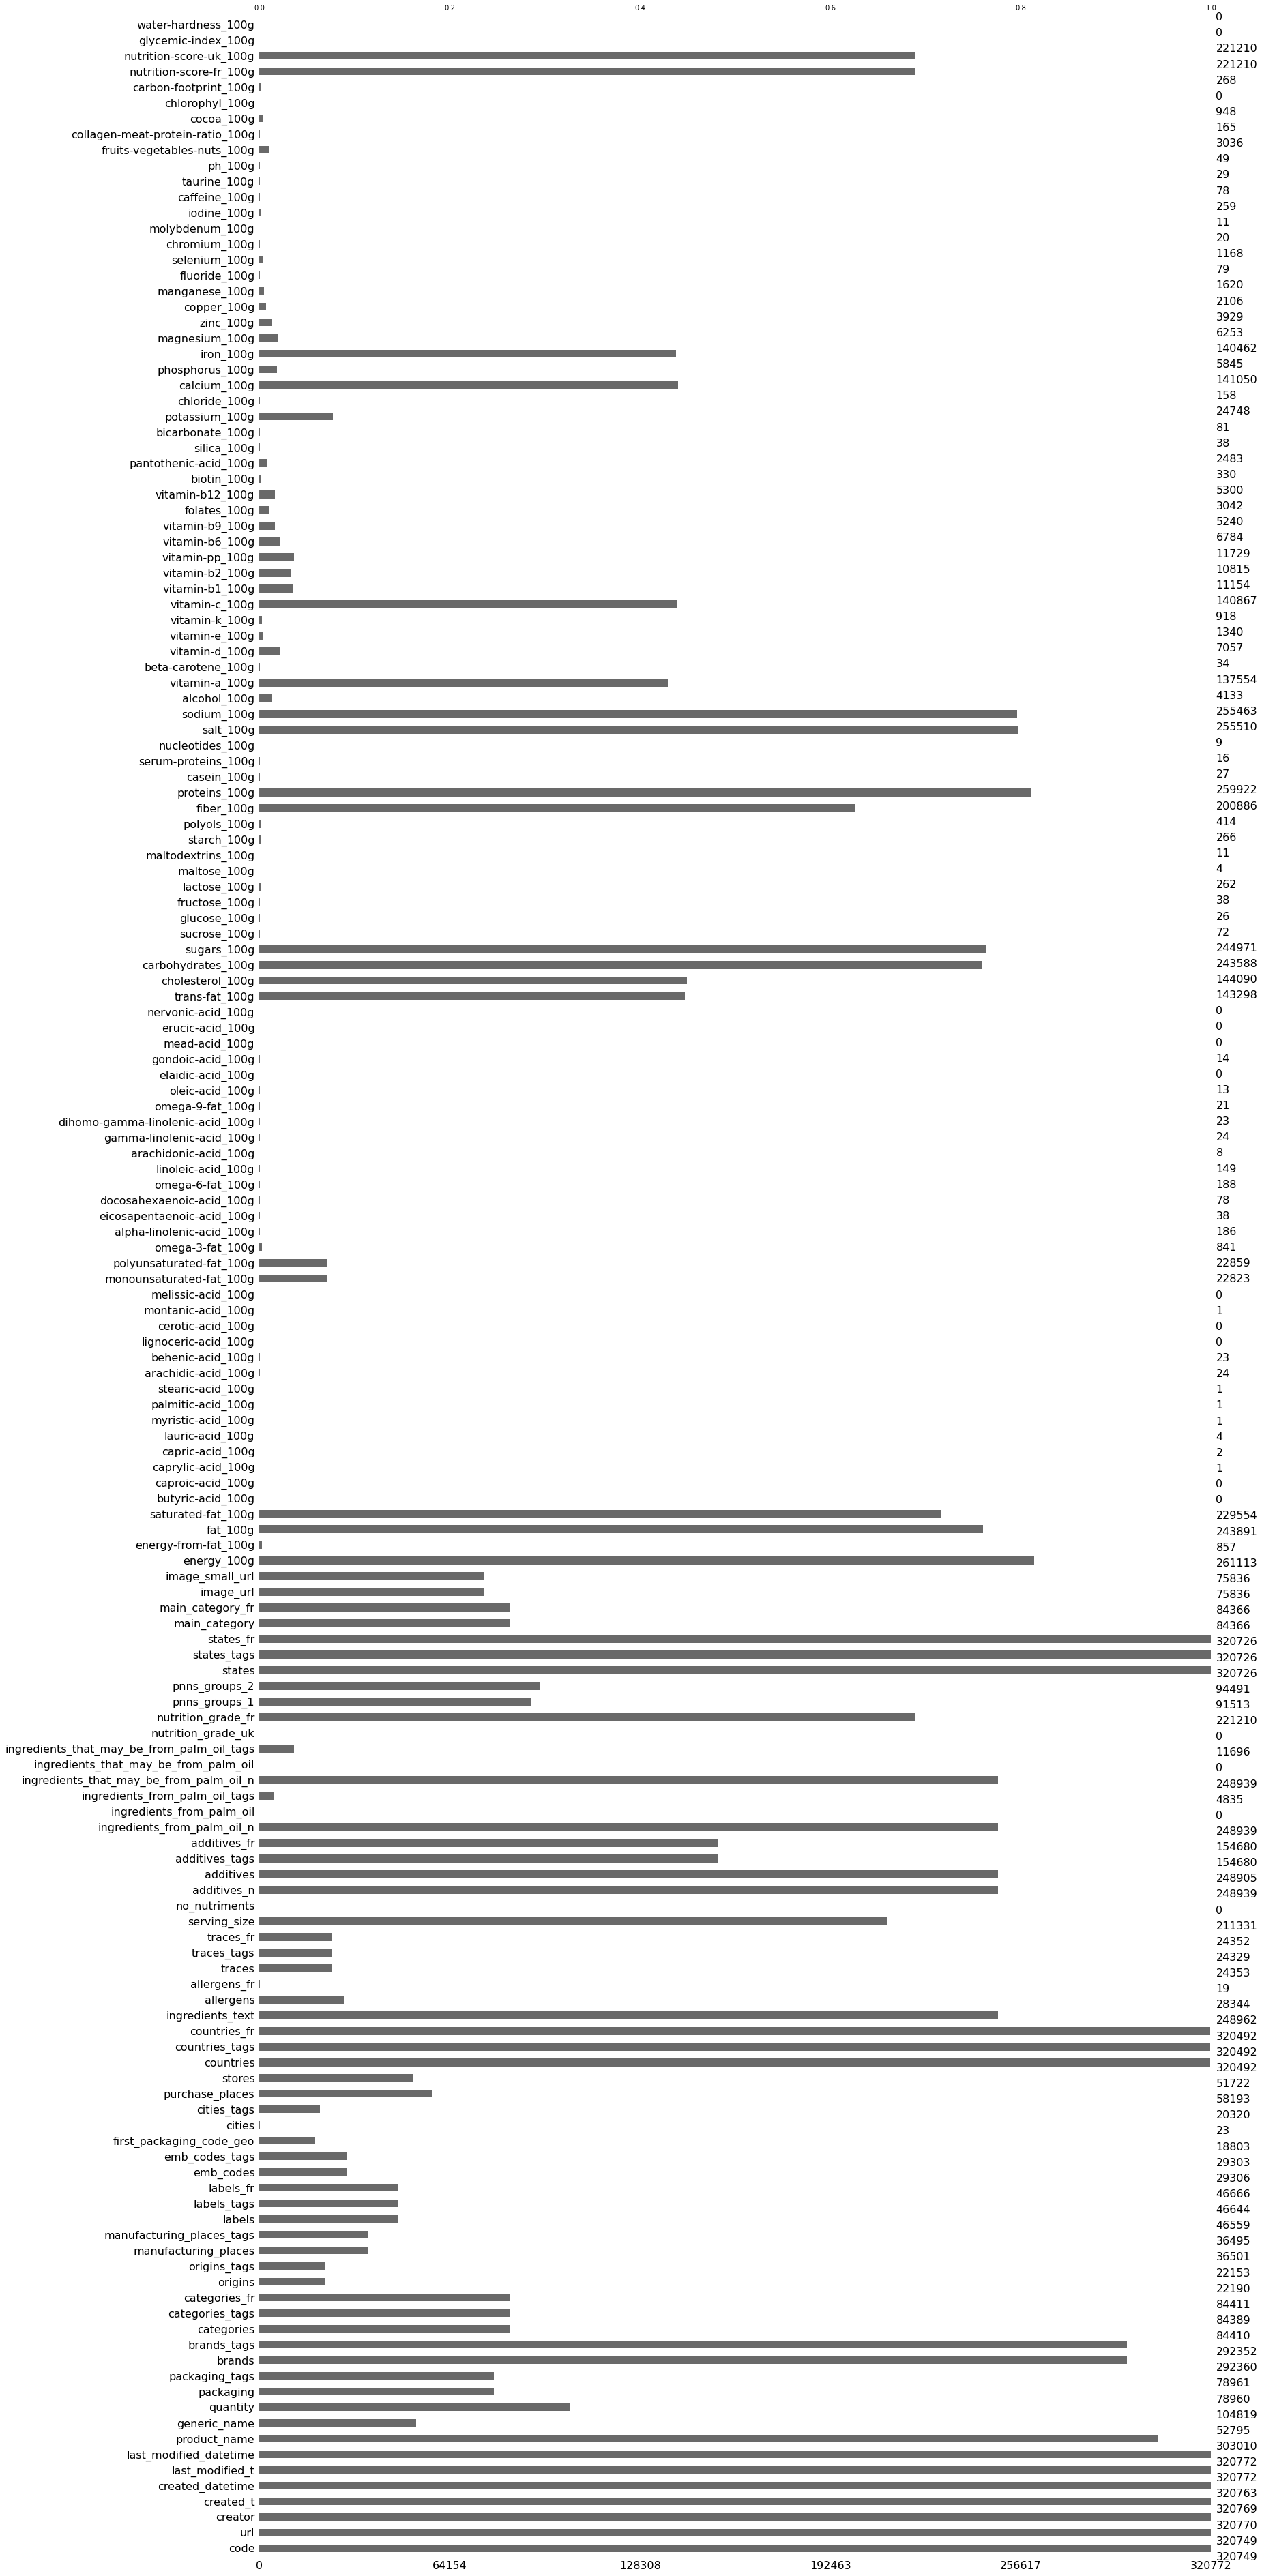

In [22]:
msno.bar(df

In [24]:
#columns
cols= df.columns.tolist()
print('columns list',cols)

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

# Partie2: Nettoyage des données <a class="anchor" id="p2"></a>
## 1.Les colonnes<a class="anchor" id="col"></a>

In [10]:
 #keep only columns with at least 20% NAN values
df.dropna(axis=1,thresh = int(0.2*df.shape[0]),inplace=True)

In [41]:
df.shape

(320772, 54)

In [8]:
df_memory2 = df.memory_usage().sum()
print('After dropping columns the total Current memory is-', df_memory2,'Bytes.','===>',size(df_memory2))

After dropping columns the total Current memory is- 0 Bytes. ===> 0B


In [58]:
cols2= df.columns.tolist()
print('After dropping columns \n Columns list:',cols2)

After dropping columns 
 Columns list: ['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'serving_size', 'additives_n', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']


In [11]:
df.dtypes

code                                        object
url                                         object
creator                                     object
created_t                                   object
created_datetime                            object
last_modified_t                             object
last_modified_datetime                      object
product_name                                object
quantity                                    object
packaging                                   object
packaging_tags                              object
brands                                      object
brands_tags                                 object
categories                                  object
categories_tags                             object
categories_fr                               object
countries                                   object
countries_tags                              object
countries_fr                                object
ingredients_text               

## 2.Regroupement  par catégorie<a class="anchor" id="cat"></a>

In [22]:
print(df['categories'].unique().shape,' categories uniques: \n',df['categories'].unique())

print('-'*20)
print(df['categories_tags'].unique().shape,' categories tags uniques: \n',df['categories_tags'].unique())
print('\n')
print('-'*20)
print(df['categories_fr'].unique().shape,' categories fr uniques: \n',df['categories_fr'].unique())

(36983,)  categories uniques: 
 [nan 'Filet de bœuf' 'Légumes-feuilles' ...
 'Boissons,Boissons alcoolisées,Vins,Vins blancs,Roussette du Bugey'
 'pl:Szprot'
 "Viandes,Produits à tartiner,Charcuteries,Produits à tartiner salés,Rillettes,Rillettes de viande,Rillettes de viande blanche,Rillettes de volaille,Rillettes d'oie"]
--------------------
(21143,)  categories tags uniques: 
 [nan 'fr:filet-de-boeuf'
 'en:plant-based-foods-and-beverages,en:plant-based-foods,en:fresh-foods,en:fruits-and-vegetables-based-foods,en:fresh-plant-based-foods,en:vegetables-based-foods,en:fresh-vegetables,en:leaf-vegetables'
 ...
 'en:plant-based-foods-and-beverages,en:plant-based-foods,en:fruits-and-vegetables-based-foods,en:fruits-based-foods,en:fruits,en:citrus,en:limes,ru:лайм'
 'en:beverages,en:alcoholic-beverages,en:wines,en:french-wines,en:white-wines,fr:bugey'
 'pl:szprot']


--------------------
(21153,)  categories fr uniques: 
 [nan 'Filet-de-boeuf'
 "Aliments et boissons à base de végétaux,Alime

In [26]:
df['categories'].isna().mean()

0.7368535907124063

In [28]:
category_dist=df.groupby(['categories']).sum()
category_dist

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
categories,,,,,,,,,,,,,,,,,,,,
100 % kokosnootwater,0.0,0.0,0.0,66.4,0.01,0.0,0.0,0.0,3.77,3.05,0.09,0.070,0.04000,0.015748,0.0,0.0000,0.0,0.0,0.0,0.0
"100 % натуральный растворимый кофе в гранулах,Instant coffees",0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.000,0.00000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0
"100 % подсолнечное рафинированное дезодорированное вымороженное масло. ГОСТ 1129-2013. Первый сорт.,en:Sunflower oils",0.0,0.0,0.0,3764.0,99.90,0.0,0.0,0.0,0.00,0.00,0.00,0.000,0.00000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0
125 g,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.520,0.00000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0
125 g (1 pot),0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.718,0.00000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"煎茶,緑茶,茶",0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.000,0.00000,0.000000,0.0,0.0072,0.0,0.0,0.0,0.0
甜類零食,4.0,0.0,0.0,1459.0,0.50,0.1,0.0,0.0,77.00,46.00,0.00,6.900,0.07000,0.027559,0.0,0.0000,0.0,0.0,14.0,14.0
"甜類零食,餅乾及蛋糕",0.0,0.0,0.0,534.0,29.00,23.1,0.0,0.0,51.70,30.80,0.00,6.500,0.40386,0.159000,0.0,0.0000,0.0,0.0,18.0,18.0


In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['ingredients_that_may_be_from_palm_oil_n'].values, title='PALM OIL', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['fat_100g'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)

fig.add_trace(go.Pie(values=category_dist['saturated-fat_100g'].values,title='SATURED FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['fiber_100g'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['proteins_100g'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['salt_100g'].values,title='SALT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

KeyError: 'fat_100g '